In [5]:
# import SVC
from pycaret.classification import *


from sklearn.metrics import accuracy_score

# import train_test_split
from sklearn.model_selection import train_test_split,cross_val_predict
# import random forest
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
# import standard scaler
from sklearn.preprocessing import StandardScaler

In [6]:
def custom_encoding(y):
    mapping = {"Standard":1,"Good":2,"Poor":0,"Bad":0,'NM':0,"No":1,"Yes":2}
    y = y.map(mapping)
    return y

In [7]:
df = pd.read_csv('../csv/credit_score_clean_extraction.csv')
x = df.drop(['Credit_Score'],axis=1)
column = x.columns
y = custom_encoding(df["Credit_Score"])
print(y.head())
print(df.describe())

0    2
1    2
2    2
3    2
4    2
Name: Credit_Score, dtype: int64
                 Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  100000.000000  100000.000000          100000.000000      100000.000000   
mean       33.316340   50505.123449            4197.270835           5.368820   
std        10.764812   38299.422093            3186.432497           2.593314   
min        14.000000    7005.930000             303.645417           0.000000   
25%        24.000000   19342.972500            1626.594167           3.000000   
50%        33.000000   36999.705000            3095.905000           5.000000   
75%        42.000000   71683.470000            5957.715000           7.000000   
max        56.000000  179987.280000           15204.633333          11.000000   

       Num_Credit_Card  Interest_Rate    Num_of_Loan  Delay_from_due_date  \
count    100000.000000   100000.00000  100000.000000         100000.00000   
mean          5.533570       14.53208       3.53

In [8]:
def out_liar(column_data):
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    lowerBand = Q1 - 1.5 * IQR
    upperBand = Q3 + 1.5 * IQR
    # number of outlier in column
    print(column_data[column_data > upperBand].count() + column_data[column_data < lowerBand].count())
    
    # convert any outlier value to upper or lower bound
    column_data = column_data.apply(lambda x: upperBand if x > upperBand else lowerBand if x < lowerBand else x)
    return column_data

   


5272
2221


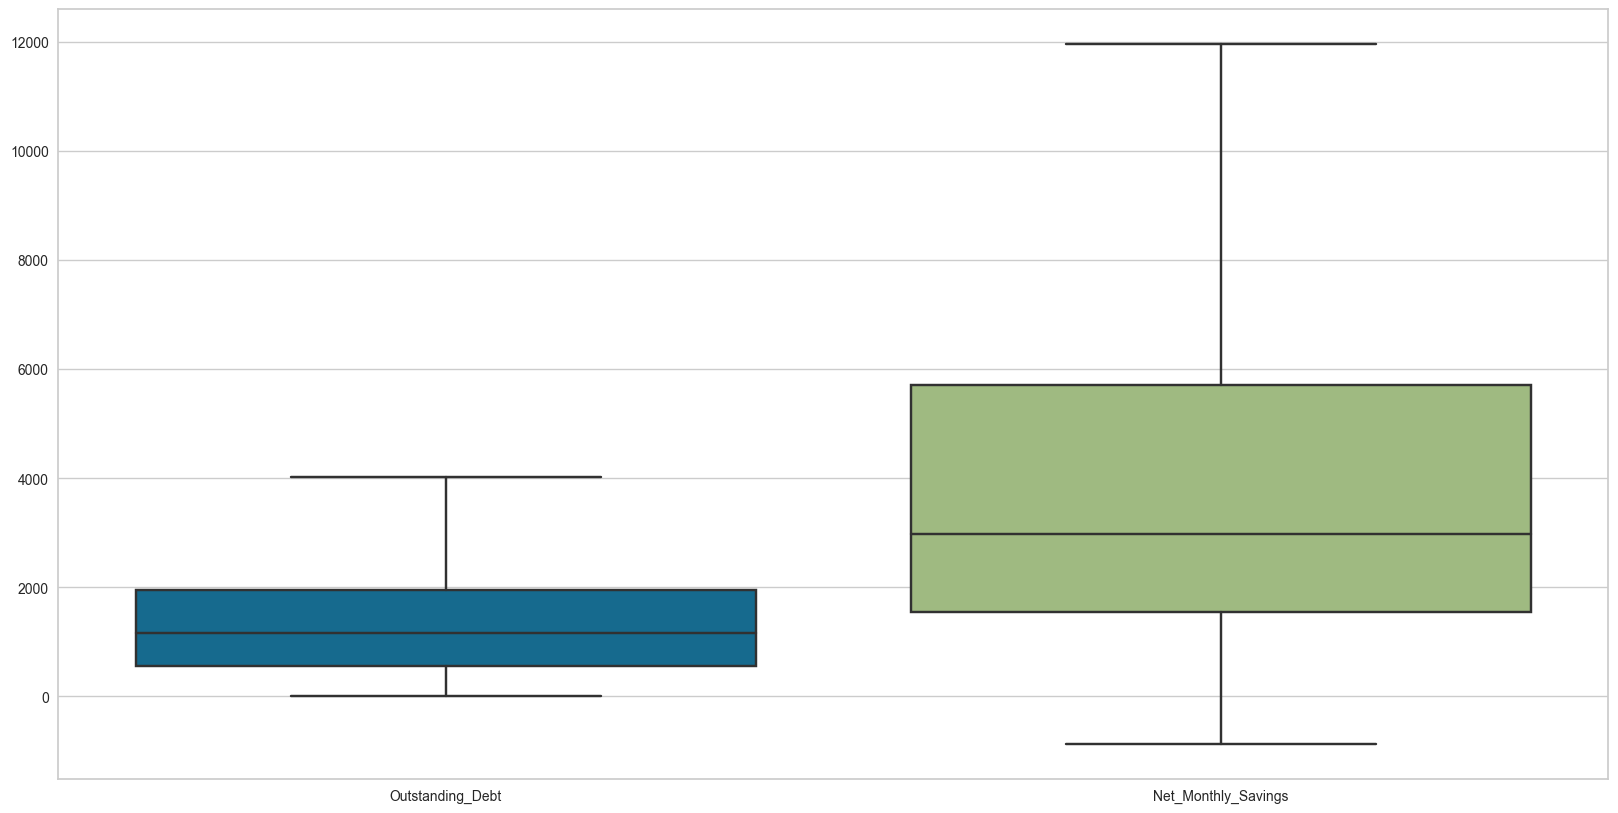

In [9]:
features=[
    "Outstanding_Debt",
    "Net_Monthly_Savings",
]   
for feature in features:
    x[feature] = out_liar(x[feature])
    
# box plot
plt.figure(figsize=(20,10))
sns.boxplot(data=x[features])
plt.show()


In [10]:
print(x[features].describe())

       Outstanding_Debt  Net_Monthly_Savings
count     100000.000000        100000.000000
mean        1399.859920          4004.212918
std         1086.193704          3013.910963
min            0.230000          -874.081193
25%          566.072500          1548.274694
50%         1166.155000          2971.296841
75%         1945.962500          5711.478598
max         4015.797500         11956.284455


In [11]:
features=[
    "Interest_Rate",
    "Credit_History_Age",
    "Credit_Mix",
    'Type_of_Loan',
    "Interest_Loan_Interaction",
    "Num_Credit_Card",
    "Outstanding_Debt",
    "Net_Monthly_Savings",
]


scaler = StandardScaler()
X = x[features]
scaled_data = scaler.fit_transform(X)
print(scaled_data[0])

x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)

[-1.31926575  0.43919988  1.27417057  0.55123281 -0.74509326 -0.74189873
 -0.54307336 -0.74667805]


In [28]:
features=[
    "Num_Credit_Card",
    "Outstanding_Debt",
    "Net_Monthly_Savings",
]
for feature in features:
    # check if all data in integer
    print(x[feature].unique())

[ 4.  5.  1.  7.  6.  8.  3.  9.  2. 10. 11.  0.]


In [29]:
first_index = x[features].loc[0]
dict_first_index = first_index.to_dict()
input_user = {'Interest_Rate': 20, 'Credit_History_Age': 300.0, 'Credit_Mix': 0.0, 'Type_of_Loan': 400.0, 'Interest_Loan_Interaction': 100.0, 'Num_Credit_Card': 8.0, 'Outstanding_Debt': 2000.98, 'Net_Monthly_Savings': 10000}
print(dict_first_index)
data_frame = pd.DataFrame(input_user,index=[0])
scaled_data_first = scaler.transform(data_frame)
print(scaled_data_first[0])

{'Num_Credit_Card': 4.0}
[ 0.62552806  0.79032271 -1.45471355  1.24320929  0.53310919  1.19319058
  0.55342163  1.98938095]


In [14]:
def ApplyModel(x_train, x_test, y_train, y_test):
    random_forest = RandomForestClassifier(n_estimators=200, max_depth=100)
    random_forest.fit(x_train, y_train)
    y_pred = random_forest.predict(x_test)
    print("Random Forest Accuracy: ", accuracy_score(y_test, y_pred))

In [15]:
random_forest = RandomForestClassifier(n_estimators=200, max_depth=100)
random_forest.fit(x_train, y_train)


RandomForestClassifier(max_depth=100, n_estimators=200)

In [30]:
print(scaled_data_first)
y_predict = random_forest.predict(scaled_data_first)
print(y_predict)

[[ 0.62552806  0.79032271 -1.45471355  1.24320929  0.53310919  1.19319058
   0.55342163  1.98938095]]
[0]


In [17]:
ApplyModel(x_train, x_test, y_train, y_test)

Random Forest Accuracy:  0.832


In [18]:
sm = SMOTE(k_neighbors=5)
x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)
ApplyModel(x_train_sm, x_test, y_train_sm, y_test)

KeyboardInterrupt: 

In [ ]:
classifiy = {
   "Age":0.83015,
   "Annual_Income":0.8319,
   "Monthly_Inhand_Salary":0.83195,
   "Num_Bank_Accounts":0.8315,
   "Credit_Utilization":0.8227,
   "Net_Monthly_Savings":0.8323,
   "Amount_invested_monthly":0.83175,
   "Total_EMI_per_month":0.8311,
   "Payment_of_Min_Amount":0.8313,
   "Num_Credit_Inquiries":0.8302,
   "Changed_Credit_Limit":0.81965,
   "Num_of_Delayed_Payment":0.8209,
   "Delay_from_due_date":0.8223,
   "Num_of_Loan":0.8314,
   "Payment_Behaviour":0.80715,
   "Monthly_Balance":0.81445,
   "Debt_to_Income_Ratio":0.8316,
   "EMI_to_Income_Ratio":0.83115,
   "Investment_to_Income_Ratio":0.8317,
   "Loan_to_Income_Ratio":0.8318,
   "Total_Financial_Obligations":0.83105,
}
print(classifiy) 


{'Age': 0.83015, 'Annual_Income': 0.8319, 'Monthly_Inhand_Salary': 0.83195, 'Num_Bank_Accounts': 0.8315, 'Credit_Utilization': 0.8227, 'Net_Monthly_Savings': 0.8323, 'Amount_invested_monthly': 0.83175, 'Total_EMI_per_month': 0.8311, 'Payment_of_Min_Amount': 0.8313, 'Num_Credit_Inquiries': 0.8302, 'Changed_Credit_Limit': 0.81965, 'Num_of_Delayed_Payment': 0.8209, 'Delay_from_due_date': 0.8223, 'Num_of_Loan': 0.8314, 'Payment_Behaviour': 0.80715, 'Monthly_Balance': 0.81445, 'Debt_to_Income_Ratio': 0.8316, 'EMI_to_Income_Ratio': 0.83115, 'Investment_to_Income_Ratio': 0.8317, 'Loan_to_Income_Ratio': 0.8318, 'Total_Financial_Obligations': 0.83105}
